<a href="https://colab.research.google.com/github/yirka71/yirka71/blob/main/15_07_23_Sistema_de_recomendaci%C3%B3n_libros_Yirka_Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerías implementadass



In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd


# Selección de las variables por tipo
# ==============================================================================
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector



#Objetivo

* Desarrollar un modelo capaz de recomendar libros  basandose en el contenido previamente consumido por el usuario.Para ello vamos a realizar lo siguiente.



#Carga de Datos


In [ ]:
#Lo primero que he realizado es compartir los 3 csv de este caso practico en la web, creando 3 URLs para
#que cualquier usuario pueda practicar con este codigo.

ruta_Books = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRKmb626lRnDALxXb_JZssyO_hgcjJQSwRXtFmW6MS-Ha-yzfWHg92FBZIxa1qjyBr3_T2yRzSoCHHX/pub?gid=1401834746&single=true&output=csv"
ruta_Users = "https://docs.google.com/spreadsheets/d/e/2PACX-1vR8mXCSdZCx2MXsYb2yiZJzWZotD8_PNOQJdn7dlj0YpDz3NcaAYd-eKEJT7q7KPwooDcfKckV7umM0/pub?output=csv"
ruta_Ratings = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSnsjollJKmnsN2CsreqtmT9nOh1mvUCXsSZCnDGoSAjN-XhPXp0iF9heriEuDHzoApkSnkZU-2babb/pub?output=csv"


frame_books = pd.read_csv(ruta_Books,encoding='UTF-8',on_bad_lines='skip',low_memory=False)
frame_users= pd.read_csv(ruta_Users,delimiter=",",encoding='UTF-8',on_bad_lines='skip',low_memory=False)
frame_ratings = pd.read_csv(ruta_Ratings,encoding='UTF-8',on_bad_lines='skip',low_memory=False) #En caso de error en alguna linea del CSV, son skip
                                                                               #no se detiene la ejecucion.

print("""\n""",20*"-","Datos del csv Books",20*"-","""\n""")
print(frame_books.head(5))

print("""\n""",20*"-","Datos del csv Users",20*"-","""\n""")
print(frame_users.head(5))
print("""\n""",20*"-","Datos del csv ratings",20*"-","""\n""")
print(frame_ratings.head(5))




 -------------------- Datos del csv Books -------------------- 

        ISBN                                         Book-Title  \
0  195153448                                Classical Mythology   
1    2005018                                       Clara Callan   
2   60973129                               Decision in Normandy   
3  374157065  Flu: The Story of the Great Influenza Pandemic...   
4  393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.

<Axes: >

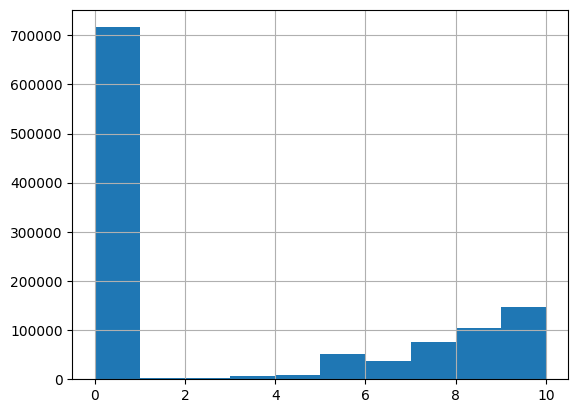

In [ ]:
frame_ratings["Book-Rating"].hist() #Se observa que mas del 50% de los registros de los libros tienen
#una valoracion igual a 0, que es el valor por defecto, se eliminan estos registros para quitar ruido al modelo

In [ ]:
#Se depuran los datos del dataframe frame_ratings, eliminando los valores Rating =0


cond_rating=(frame_ratings["Book-Rating"] != 0)

frame_ratings=frame_ratings.loc[cond_rating]


print(frame_ratings.head(5))
frame_ratings.info()

   User-ID        ISBN  Book-Rating
1   276726   155061224            5
3   276729  052165615X            3
4   276729   521795028            6
6   276736  3257224281            8
7   276737   600570967            6
<class 'pandas.core.frame.DataFrame'>
Int64Index: 433671 entries, 1 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      433671 non-null  int64 
 1   ISBN         433671 non-null  object
 2   Book-Rating  433671 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 13.2+ MB


<Axes: >

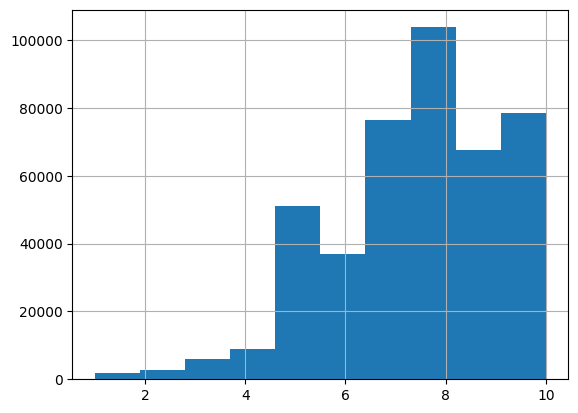

In [ ]:
frame_ratings["Book-Rating"].hist()

#Creación dataframe con los tres csv de nuestro problema.

Vamos a concatener los tres dataframes obtenidos para trabajar con un unico dataframe, el cual contendrá toda la información necesaria para empezar a crear nuetro modelo.

* Concatenamos los csv frame_users con el dataframe frame_ratings.

* Depues hacemos una segunda concatenación con ese dataframe obtenido con el dataframe frame_books.

In [ ]:
user_ratings=pd.merge(frame_users, frame_ratings,on='User-ID')
print(user_ratings.head(5))




   User-ID                  Location  Age        ISBN  Book-Rating
0        8  timmins, ontario, canada  NaN     2005018            5
1        8  timmins, ontario, canada  NaN  074322678X            5
2        8  timmins, ontario, canada  NaN   887841740            5
3        8  timmins, ontario, canada  NaN  1552041778            5
4        8  timmins, ontario, canada  NaN  1567407781            6


In [ ]:
user_ratings_books=pd.merge(user_ratings,frame_books,on='ISBN')
print(user_ratings_books.head(5))


   User-ID                   Location   Age     ISBN  Book-Rating  \
0        8   timmins, ontario, canada   NaN  2005018            5   
1    11676              n/a, n/a, n/a   NaN  2005018            8   
2    67544   toronto, ontario, canada  30.0  2005018            8   
3   116866                  ottawa, ,   NaN  2005018            9   
4   123629  kingston, ontario, canada   NaN  2005018            9   

     Book-Title           Book-Author Year-Of-Publication  \
0  Clara Callan  Richard Bruce Wright                2001   
1  Clara Callan  Richard Bruce Wright                2001   
2  Clara Callan  Richard Bruce Wright                2001   
3  Clara Callan  Richard Bruce Wright                2001   
4  Clara Callan  Richard Bruce Wright                2001   

               Publisher                                        Image-URL-S  \
0  HarperFlamingo Canada  http://images.amazon.com/images/P/0002005018.0...   
1  HarperFlamingo Canada  http://images.amazon.com/images/P/

In [ ]:
user_ratings_books.info() #Este es el dataframe con el que empezamos a trabajar.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384085 entries, 0 to 384084
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              384085 non-null  int64  
 1   Location             384085 non-null  object 
 2   Age                  269705 non-null  float64
 3   ISBN                 384085 non-null  object 
 4   Book-Rating          384085 non-null  int64  
 5   Book-Title           384085 non-null  object 
 6   Book-Author          384084 non-null  object 
 7   Year-Of-Publication  384085 non-null  object 
 8   Publisher            384083 non-null  object 
 9   Image-URL-S          384085 non-null  object 
 10  Image-URL-M          384085 non-null  object 
 11  Image-URL-L          384084 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 38.1+ MB


In [ ]:
user_ratings_books.describe()

,User-ID,Age,Book-Rating
count,384085.000000,269705.000000,384085.000000
mean,136053.480948,36.837600,7.626945
std,80483.883074,13.754673,1.841302
min,8.000000,0.000000,1.000000
25%,67627.000000,28.000000,7.000000
50%,133885.000000,35.000000,8.000000
75%,206219.000000,45.000000,9.000000
max,278854.000000,244.000000,10.000000


In [ ]:
datos=user_ratings_books.drop(columns=["Location","Age","Image-URL-S","Image-URL-M","Image-URL-L"],axis=1)
#De todas las columnas del dataframe inicial solo nos interesan aquellas relacionadas
#con los libros y los usuarios que hayan consumido dicho libro.

In [ ]:
datos.describe()

,User-ID,Book-Rating
count,384085.000000,384085.000000
mean,136053.480948,7.626945
std,80483.883074,1.841302
min,8.000000,1.000000
25%,67627.000000,7.000000
50%,133885.000000,8.000000
75%,206219.000000,9.000000
max,278854.000000,10.000000


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384085 entries, 0 to 384084
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   User-ID              384085 non-null  int64 
 1   ISBN                 384085 non-null  object
 2   Book-Rating          384085 non-null  int64 
 3   Book-Title           384085 non-null  object
 4   Book-Author          384084 non-null  object
 5   Year-Of-Publication  384085 non-null  object
 6   Publisher            384083 non-null  object
dtypes: int64(2), object(5)
memory usage: 23.4+ MB


In [ ]:
#Se va a evaluar que libros  le va a gustar a un usuario en función de lo que haya consumido previamente
#Pero como el dataframe tiene muchos registro voy a crear una libreria con aquellas referencias que hayan tenido mas de
#20 valoraciones de diferentes usuarios.

evaluar_isbn=datos.groupby("ISBN")["User-ID"].count().sort_values(ascending=False)>20
print(evaluar_isbn)

ISBN
316666343      True
971880107      True
385504209      True
312195516      True
60928336       True
              ...  
373292074     False
373292066     False
373292023     False
373292007     False
B000234N3A    False
Name: User-ID, Length: 149869, dtype: bool


In [ ]:
cond_isbn=(evaluar_isbn == True)
evaluar_isbn2=evaluar_isbn.loc[cond_isbn]
print(evaluar_isbn2.head())
evaluar_isbn2.info()

serieIsbn_validos=evaluar_isbn2.index

ISBN
316666343    True
971880107    True
385504209    True
312195516    True
60928336     True
Name: User-ID, dtype: bool
<class 'pandas.core.series.Series'>
Index: 1993 entries, 316666343 to 786866020
Series name: User-ID
Non-Null Count  Dtype
--------------  -----
1993 non-null   bool 
dtypes: bool(1)
memory usage: 17.5+ KB


In [ ]:
print(serieIsbn_validos) #Solo vamos a evaluar estos libros
print(type(serieIsbn_validos))

Index(['316666343', '971880107', '385504209', '312195516', '60928336',
       '059035342X', '142001740', '446672211', '044023722X', '452282152',
       ...
       '446525774', '373825013', '385475772', '609809547', '886773520',
       '425080021', '553287346', '515121495', '679736042', '786866020'],
      dtype='object', name='ISBN', length=1993)
<class 'pandas.core.indexes.base.Index'>


In [ ]:
datos_utiles = datos[datos.ISBN.isin(serieIsbn_validos[:])] #Este dataframe contiene toda la informacion de aquellos
                                                            #libros que han recibido mas de 20 valoraciones y de los usuarios que han votado.
datos_utiles.info()

print(datos_utiles.head(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92944 entries, 16 to 264628
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User-ID              92944 non-null  int64 
 1   ISBN                 92944 non-null  object
 2   Book-Rating          92944 non-null  int64 
 3   Book-Title           92944 non-null  object
 4   Book-Author          92944 non-null  object
 5   Year-Of-Publication  92944 non-null  object
 6   Publisher            92944 non-null  object
dtypes: int64(2), object(5)
memory usage: 5.7+ MB
    User-ID       ISBN  Book-Rating                            Book-Title  \
16        9  452264464            6  Beloved (Plume Contemporary Fiction)   
17     3373  452264464           10  Beloved (Plume Contemporary Fiction)   
18     5555  452264464            9  Beloved (Plume Contemporary Fiction)   
19     6242  452264464            5  Beloved (Plume Contemporary Fiction)   
20     8570  4

#Sistema de recomendación basada en contenido

Como metrica para comparar cuanto se parece un libro a otro utilizaremos la metrica  Cosine Similarity o Similitud Coseno.

In [ ]:

libros_a_recomendar = frame_books[frame_books.ISBN.isin(serieIsbn_validos[:])] #Dataframe que contiene nuestra libreria,
#con los libros disponibles para recomendar.

libros_a_recomendar=libros_a_recomendar.drop(columns=["Image-URL-S","Image-URL-M","Image-URL-L"],axis=1)
libros_a_recomendar.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 18 to 113932
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ISBN                 1993 non-null   object
 1   Book-Title           1993 non-null   object
 2   Book-Author          1993 non-null   object
 3   Year-Of-Publication  1993 non-null   object
 4   Publisher            1993 non-null   object
dtypes: object(5)
memory usage: 93.4+ KB


In [ ]:
libros_a_recomendar.iloc[:5]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
18,440234743,The Testament,John Grisham,1999,Dell
19,452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume
26,971880107,Wild Animus,Rich Shapero,2004,Too Far
27,345402871,Airframe,Michael Crichton,1997,Ballantine Books
28,345417623,Timeline,MICHAEL CRICHTON,2000,Ballantine Books


##Definir Pipelines

Scikit-learn tiene la posibilidad de crear pipeline con todas las transformaciones de los datos y asi poder ir desde los datos leídos hasta los datos listos para llevar a los modelos que se quieren entrenar de forma  sencilla.

El objetivo es crear una matriz dispersa que se  almacene en un DataFrame, por filas indica los libros y por columnas las nombres de las características de los libros(autor,editorial,año etc)


In [ ]:
# Las columnas del dataframe libros_a_recomendar son del tipo string, vectorizar los libros haciendo
#one-hot-encoding.
columnas_libros_recomendar = libros_a_recomendar.columns.to_list()

In [ ]:
print("""\n""",20*"-","Se realiza one hot encoding de las columnas con los atributos (autor,editorial etc) de la libreria",20*"-","""\n""")

#Transformaciones para las variables categóricas de todos los libros que estaran en nuestra libreria para ser recomendados
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore',sparse_output=False))])

preprocessor = ColumnTransformer(
                    transformers=[('cat', categorical_transformer, columnas_libros_recomendar)
                    ],
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")


 -------------------- Se realiza one hot encoding de las columnas con los atributos (autor,editorial etc) de la libreria -------------------- 



In [ ]:
matriz_libros = preprocessor.fit_transform(libros_a_recomendar) #Nos devuelve la matrix dispersa de los libros en formato dataframe

matriz_libros

,ISBN_000649840X,ISBN_002542730X,ISBN_006000438X,ISBN_006001203X,ISBN_006016848X,ISBN_006019491X,ISBN_006092988X,ISBN_006098824X,ISBN_006099486X,ISBN_006101351X,...,Publisher_Washington Square Press,Publisher_William Morrow,Publisher_William Morrow &amp; Company,Publisher_Wizards of the Coast,Publisher_Workman Pub Co,Publisher_Workman Publishing,Publisher_Yearling,Publisher_Yearling Books,Publisher_Zebra Books,Publisher_Zondervan Publishing Company
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Para poder entender mejor la información vamos a cambiar los nombres de los indices del dataframe. Para saber a que libro corresponde cada fila.

In [ ]:

matriz_libros_df=matriz_libros.set_index(libros_a_recomendar["Book-Title"])
matriz_libros_df


,ISBN_000649840X,ISBN_002542730X,ISBN_006000438X,ISBN_006001203X,ISBN_006016848X,ISBN_006019491X,ISBN_006092988X,ISBN_006098824X,ISBN_006099486X,ISBN_006101351X,...,Publisher_Washington Square Press,Publisher_William Morrow,Publisher_William Morrow &amp; Company,Publisher_Wizards of the Coast,Publisher_Workman Pub Co,Publisher_Workman Publishing,Publisher_Yearling,Publisher_Yearling Books,Publisher_Zebra Books,Publisher_Zondervan Publishing Company
Book-Title,,,,,,,,,,,,,,,,,,,,,
The Testament,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Beloved (Plume Contemporary Fiction),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wild Animus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Airframe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Timeline,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Fallen Man (Joe Leaphorn Novels),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Wolves of the Calla (The Dark Tower, Book 5)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Well-Schooled in Murder,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


#Se calcula la similitud de coseno entre todas las filas del dataframe matriz_libros_df y se almacena en un array. Conseguimos
#la similitud entre los libros, va a estar entre 0-1, 1 indica que se esta comparando el mismo libro.

vector_similitud_libros=cosine_similarity(matriz_libros_df.values)
vector_similitud_libros


array([[1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 1. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 1. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0.2],
       [0. , 0. , 0. , ..., 0. , 0.2, 1. ]])

#Construir el dataframe de similitudes del coseno

Una vez calculados esos valores construimos un nuevo DataFrame de similitudes coseno.Esto nos permite saber qué libros son más parecidos a uno en concreto basándonos en sus caracteristicas.

In [ ]:
cos_sim_df=pd.DataFrame(vector_similitud_libros,index= matriz_libros_df.index,columns= matriz_libros_df.index)
cos_sim_df #DataFrame de similitudes coseno, pasamos de un array a un dataframe.


Book-Title,The Testament,Beloved (Plume Contemporary Fiction),Wild Animus,Airframe,Timeline,To Kill a Mockingbird,Seabiscuit: An American Legend,Pigs in Heaven,I'll Be Seeing You,From the Corner of His Eye,...,You Shall Know Our Velocity,Felidae. Roman.,Dr. Death: A Novel,Watership Down,The Mammy,The Fallen Man (Joe Leaphorn Novels),"Wolves of the Calla (The Dark Tower, Book 5)",Well-Schooled in Murder,Harry Potter and the Chamber of Secrets Postcard Book,The Purpose-Driven Life: What on Earth Am I Here For?
Book-Title,,,,,,,,,,,,,,,,,,,,,
The Testament,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0
Beloved (Plume Contemporary Fiction),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wild Animus,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Airframe,0.0,0.0,0.0,1.0,0.2,0.0,0.2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0
Timeline,0.0,0.0,0.0,0.2,1.0,0.0,0.2,0.0,0.0,0.0,...,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Fallen Man (Joe Leaphorn Novels),0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
"Wolves of the Calla (The Dark Tower, Book 5)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Well-Schooled in Murder,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Esto nos permite saber qué libros son más parecidos a uno en concreto basándonos en sus caracteristicas.

Del dataframe de similitudes coseno selecciona un libro con un titulo cualquiera,con iloc. Una vez seleccionado, lo organizamos en orden descendente y que nos muestre los 5 libros mas similares.


In [ ]:
cos_sim_df.loc["Well-Schooled in Murder"].sort_values(ascending=False).head(5) #Nos muestra como es logico el mismo libro en primer lugar.

Book-Title
Well-Schooled in Murder    1.0
A Traitor to Memory        0.4
The Bourne Ultimatum       0.4
A Great Deliverance        0.4
The Anastasia Syndrome     0.2
Name: Well-Schooled in Murder, dtype: float64

#Vamos a elegir un usuario al azar con todas aquellos libros que haya leido.

In [ ]:

lectores=datos_utiles.groupby("User-ID")["Book-Rating"].agg([len,min,max])  #Se observa el numero de valoraciones que
#han dado los usuarios, es decir el numero de libros que han leido y el intervalo de las valoraciones que han dado.
print(lectores)

         len  min  max
User-ID               
9          1    6    6
16         1    9    9
17         1    6    6
26         2    9   10
32         1    8    8
...      ...  ...  ...
278843    11    7    9
278844     1    6    6
278846     1    8    8
278851     1    8    8
278854     3    7    8

[30862 rows x 3 columns]


In [ ]:
import random #Vamos a elegir un usuarios al azar.

index=random.randrange(0, len(lectores),4)
lector=lectores[index:index+1]
print(lector)
user_evaluado=lector.index[0]

print("\n","El usuario al que vamos a recomendar libros tiene el User-ID:",user_evaluado)




         len  min  max
User-ID               
181736     4    6   10

 El usuario al que vamos a recomendar libros tiene el User-ID: 181736


In [ ]:
libros_leidos_user_evaluado=datos_utiles.loc[(datos['User-ID']==user_evaluado)]
libros_leidos_user_evaluado



,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
22370,181736,1400034779,6,The No. 1 Ladies' Detective Agency (Today Show...,Alexander McCall Smith,2003,Anchor
81882,181736,380792745,9,The Lust Lizard of Melancholy Cove,Christopher Moore,2000,Perennial
83621,181736,767900383,10,Under the Tuscan Sun,Frances Mayes,1997,Broadway
166800,181736,140119906,8,Love in the Time of Cholera (Penguin Great Boo...,Gabriel Garcia Marquez,1994,Penguin Books


##Crear perfil del user_evaluado

In [ ]:
#Primero se crea una lista con los titulos de los libros que se haya leido el usuario

lista_libros_leidos=libros_leidos_user_evaluado['Book-Title'].unique().tolist()

perfil_usuario= matriz_libros_df.loc[lista_libros_leidos,:]
perfil_usuario



,ISBN_000649840X,ISBN_002542730X,ISBN_006000438X,ISBN_006001203X,ISBN_006016848X,ISBN_006019491X,ISBN_006092988X,ISBN_006098824X,ISBN_006099486X,ISBN_006101351X,...,Publisher_Washington Square Press,Publisher_William Morrow,Publisher_William Morrow &amp; Company,Publisher_Wizards of the Coast,Publisher_Workman Pub Co,Publisher_Workman Publishing,Publisher_Yearling,Publisher_Yearling Books,Publisher_Zebra Books,Publisher_Zondervan Publishing Company
Book-Title,,,,,,,,,,,,,,,,,,,,,
The No. 1 Ladies' Detective Agency (Today Show Book Club #8),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Lust Lizard of Melancholy Cove,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Under the Tuscan Sun,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Love in the Time of Cholera (Penguin Great Books of the 20th Century),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Para terminar de construir el perfil de este usuario es necesario representar todas las preferencias del usuario en una única serie.

In [ ]:
perfil_usuario_final=perfil_usuario.mean()
perfil_usuario_final

ISBN_000649840X                           0.0
ISBN_002542730X                           0.0
ISBN_006000438X                           0.0
ISBN_006001203X                           0.0
ISBN_006016848X                           0.0
                                         ... 
Publisher_Workman Publishing              0.0
Publisher_Yearling                        0.0
Publisher_Yearling Books                  0.0
Publisher_Zebra Books                     0.0
Publisher_Zondervan Publishing Company    0.0
Length: 4840, dtype: float64

Después calcularemos la similitud coseno entre el perfil de usuario que acabamos de crear y el DataFrame de libros.Tras almacenar los datos de salida en un nuevo DataFrame y ordenar los resultados, se obtiene el orden de recomendación de libros.

In [ ]:

def recomendar_libros():

    perfil_usuario_similitud=cosine_similarity(perfil_usuario_final.values.reshape(1,-1),matriz_libros_df)
    perfil_usuario_similitud_df=pd.DataFrame(perfil_usuario_similitud.T,index= matriz_libros_df.index,columns=["similitud coseno"])
    orden_recomendacion= perfil_usuario_similitud_df.sort_values(by="similitud coseno",ascending=False).head(5)
    titulos_recomendados=orden_recomendacion.index.tolist()

    libros_recomendados = frame_books[frame_books["Book-Title"].isin(titulos_recomendados)]


    return libros_recomendados



In [ ]:
recomendar_libros()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1406,1400034779,The No. 1 Ladies' Detective Agency (Today Show...,Alexander McCall Smith,2003,Anchor,http://images.amazon.com/images/P/1400034779.0...,http://images.amazon.com/images/P/1400034779.0...,http://images.amazon.com/images/P/1400034779.0...
3494,140119906,Love in the Time of Cholera (Penguin Great Boo...,Gabriel Garcia Marquez,1994,Penguin Books,http://images.amazon.com/images/P/0140119906.0...,http://images.amazon.com/images/P/0140119906.0...,http://images.amazon.com/images/P/0140119906.0...
4036,767900383,Under the Tuscan Sun,Frances Mayes,1997,Broadway,http://images.amazon.com/images/P/0767900383.0...,http://images.amazon.com/images/P/0767900383.0...,http://images.amazon.com/images/P/0767900383.0...
7366,380792745,The Lust Lizard of Melancholy Cove,Christopher Moore,2000,Perennial,http://images.amazon.com/images/P/0380792745.0...,http://images.amazon.com/images/P/0380792745.0...,http://images.amazon.com/images/P/0380792745.0...
17567,380975068,The Lust Lizard of Melancholy Cove,Christopher Moore,1999,Spike,http://images.amazon.com/images/P/0380975068.0...,http://images.amazon.com/images/P/0380975068.0...,http://images.amazon.com/images/P/0380975068.0...
19346,380816547,Island of the Sequined Love Nun,Christopher Moore,2000,Perennial,http://images.amazon.com/images/P/0380816547.0...,http://images.amazon.com/images/P/0380816547.0...,http://images.amazon.com/images/P/0380816547.0...
40799,60735457,The Lust Lizard of Melancholy Cove,Christopher Moore,2004,Perennial,http://images.amazon.com/images/P/0060735457.0...,http://images.amazon.com/images/P/0060735457.0...,http://images.amazon.com/images/P/0060735457.0...
60039,60735449,Island of the Sequined Love Nun,Christopher Moore,2004,Perennial,http://images.amazon.com/images/P/0060735449.0...,http://images.amazon.com/images/P/0060735449.0...,http://images.amazon.com/images/P/0060735449.0...
69563,140281649,Love in the Time of Cholera (Penguin Great Boo...,Gabriel Garcia Marquez,1999,Penguin Books,http://images.amazon.com/images/P/0140281649.0...,http://images.amazon.com/images/P/0140281649.0...,http://images.amazon.com/images/P/0140281649.0...
72089,038097505X,Island of the Sequined Love Nun,Christopher Moore,1997,Avon Books,http://images.amazon.com/images/P/038097505X.0...,http://images.amazon.com/images/P/038097505X.0...,http://images.amazon.com/images/P/038097505X.0...
